In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header =None)

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
col=['sepal length','sepal width','petal length','petal width','Species']

In [ ]:
df.columns =col

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


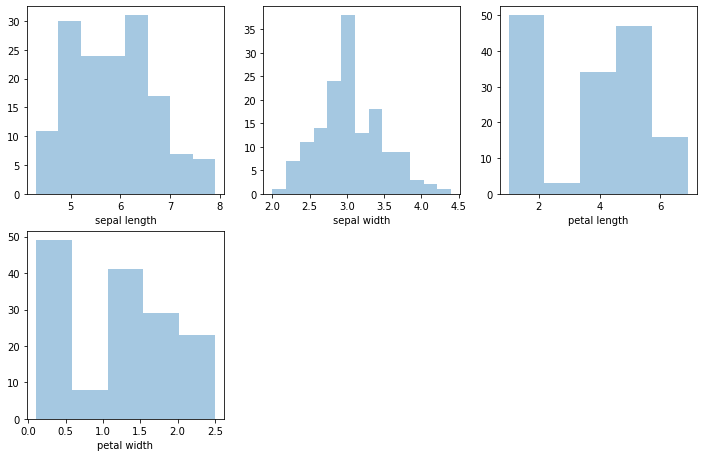

In [ ]:
# Histogram
col = df.columns
plt.figure(figsize=(12,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.distplot(df[col[i]],kde=False)
plt.show()

In [ ]:
df_0 = df[df.Species=='Iris-setosa']
df_1 = df[df.Species=='Iris-versicolor']
df_2 = df[df.Species=='Iris-virginica']

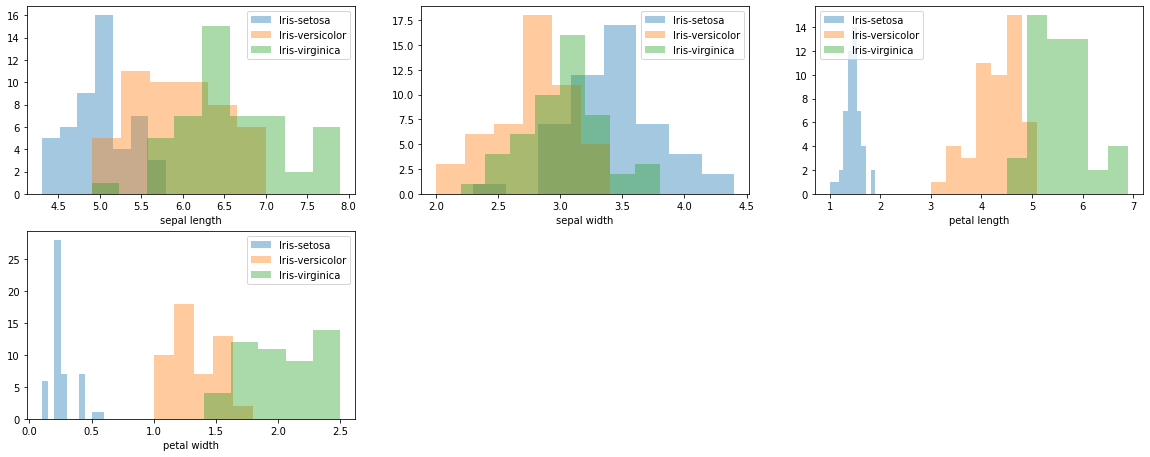

In [ ]:
#Histogram after classification
col = df.columns
plt.figure(figsize=(20,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.distplot(df_0[col[i]],kde=False, label='Iris-setosa')
  sns.distplot(df_1[col[i]],kde=False, label='Iris-versicolor')
  sns.distplot(df_2[col[i]],kde=False, label='Iris-virginica')
  plt.legend()
plt.show()

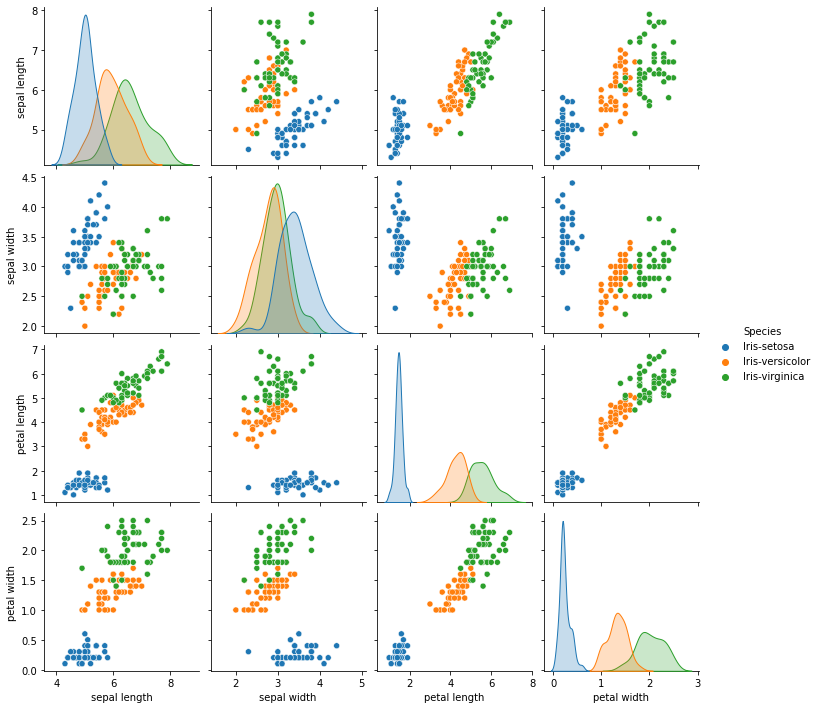

In [ ]:
#Pairwise bivariate distribution
sns.pairplot(df, hue= 'Species')

In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

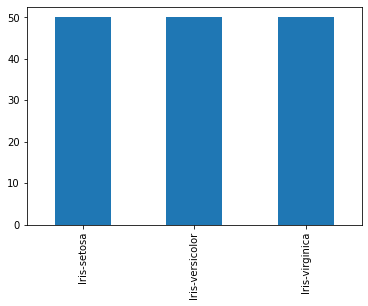

In [ ]:
df.Species.value_counts().plot(kind='bar')

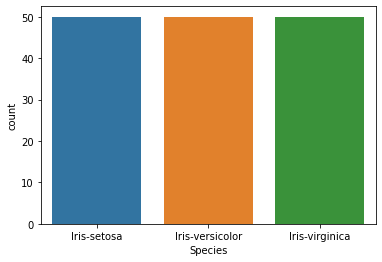

In [ ]:
#Count plot
sns.countplot(x='Species', data=df)

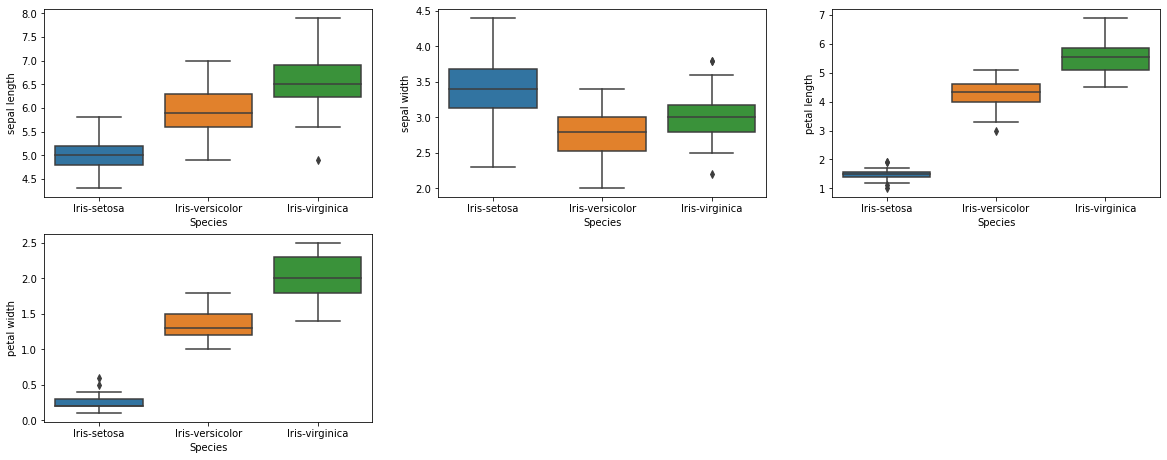

In [ ]:
#Analyse to column with respect to Outcome
col = df.columns
plt.figure(figsize=(20,20))
for i in range(len(col)-1):
  plt.subplot(5,3,i+1)
  sns.boxplot(x='Species', y=col[i], data=df)
plt.show()

# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#Value count after encoding
df.Species = le.fit_transform(df.Species)
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Creation

In [ ]:
#Model creation
x= df.iloc[:,0:4]
y= df.iloc[:,4:]
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.6,random_state=17)

# **Logistic Regression**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
#Training
model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
#Prediction for the test data on the basis of training
pred=model.predict(x_test)
pred

array([0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2])

**Model Evaluation**

In [ ]:
#Logistic regression model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy of Logistic Regression Model :' , accuracy_score(y_test,pred)*100,'%')

Accuracy of Logistic Regression Model : 95.55555555555556 %


In [ ]:
confusion_matrix(y_test,pred)

array([[29,  0,  0],
       [ 0, 28,  2],
       [ 0,  2, 29]])

# **KNN**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier()

In [ ]:
#Training
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#Prediction for the test data on the basis of training
pred1=model1.predict(x_test)
pred1

array([0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2])

**KNN MODEL EVALUATION**

In [ ]:
#KNN model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy of KNN Model :' , accuracy_score(y_test,pred1)*100,'%')

Accuracy of KNN Model : 96.66666666666667 %


In [ ]:
confusion_matrix(y_test,pred1)

array([[29,  0,  0],
       [ 0, 30,  0],
       [ 0,  3, 28]])

**Parameter Tuning**

In [ ]:
#Hyper parameter tuning - change in value of k
k = np.arange(3,60,2)
k

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59])

In [ ]:
accu=[]
for i in k:
  model1= KNeighborsClassifier(n_neighbors=i)
  model1.fit(x_train , y_train)
  pred1 = model1.predict(x_test)
  # storing accuracy in the list
  accu.append(accuracy_score(y_test,pred1))
accu

[0.9777777777777777,
 0.9666666666666667,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9666666666666667,
 0.9555555555555556,
 0.9555555555555556,
 0.9444444444444444,
 0.9111111111111111,
 0.9111111111111111,
 0.8777777777777778,
 0.8888888888888888,
 0.9,
 0.9,
 0.8666666666666667,
 0.8777777777777778,
 0.6444444444444445,
 0.6444444444444445,
 0.6444444444444445,
 0.6444444444444445,
 0.6444444444444445,
 0.6444444444444445,
 0.6444444444444445,
 0.6444444444444445,
 0.6,
 0.5444444444444444,
 0.32222222222222224]

In [ ]:
result = pd.DataFrame({'Neighbours': k, 'AccuracyScore':accu})
result.iloc[:20,:]

,Neighbours,AccuracyScore
0,3,0.977778
1,5,0.966667
2,7,0.955556
3,9,0.977778
4,11,0.955556
5,13,0.955556
6,15,0.966667
7,17,0.955556
8,19,0.955556
9,21,0.944444


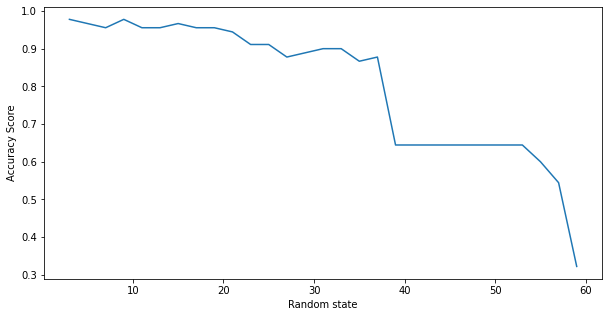

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(k,accu)
plt.xlabel('Random state')
plt.ylabel('Accuracy Score')
plt.show()

In [ ]:
# distance metric
dis=['manhattan','euclidean' ,'hamming']
accu1=[]
for i in dis:
  model2= KNeighborsClassifier(n_neighbors=9,metric=i)
  model2.fit(x_train , y_train)
  pred1 = model2.predict(x_test)
  # storing accuracy in the list
  accu1.append(accuracy_score(y_test,pred1))

accu1

[0.9555555555555556, 0.9777777777777777, 0.8111111111111111]

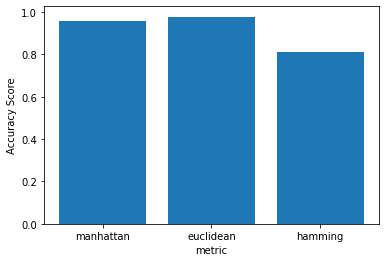

In [ ]:
plt.bar(dis,accu1)
plt.xlabel('metric')
plt.ylabel('Accuracy Score')
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()

In [ ]:
#Training
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Prediction for the test data on the basis of training
pred3=model.predict(x_test)
pred3

array([0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2])

In [ ]:
print(model3.max_depth)

None


In [ ]:
n=model3.max_depth()
print(n)

Model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print('Accuracy of Model :' , accuracy_score(y_test,pred3)*100)

Accuracy of Model : 95.55555555555556


In [ ]:
confusion_matrix(y_test,pred3)

array([[29,  0,  0],
       [ 0, 28,  2],
       [ 0,  2, 29]])

Hyper Parametrt Tuning

In [ ]:
accu=[]
for i in range (2,100):
  model4= DecisionTreeClassifier(max_depth=i)
  model4.fit(x_train , y_train)
  pred4 = model4.predict(x_test)
  # storing accuracy in the list
  accu.append(round(accuracy_score(y_test,pred4)*100))
  accu